8474
7808
{101.01: 1450, 100.0: 3780, 99.01: 2578}


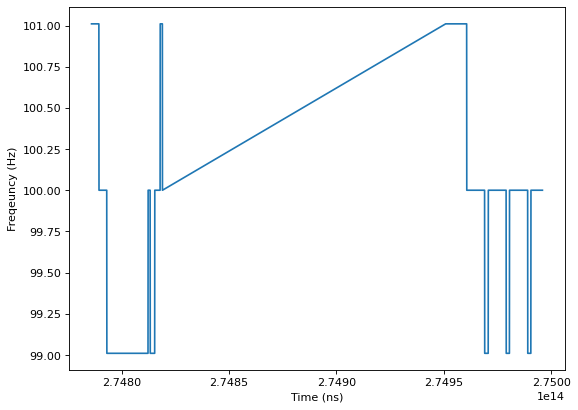

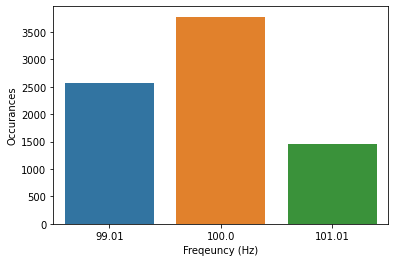

In [82]:
import pandas as pd
from collections import Counter
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
from scipy import stats

data_dir = 'exp8'
min_occurances = 5

df = pd.DataFrame()
for file in os.listdir(data_dir):
    if file.startswith('Session'):
        continue
    if file.endswith('0.csv'):
        with open(f'{data_dir}/{file}') as f:
            starttime_millis = int(f.readline().rstrip()[17:])
    tmp = pd.read_csv(f'{data_dir}/{file}', skiprows=1)
    df = pd.concat([df, tmp], ignore_index=True)
df = df.sort_values(by=['timestamp'], ignore_index=True)

print(len(df))
# get readable time (delta from start time)
real_times = []
for time_millis in df['real time']:
    delta = (time_millis - starttime_millis) # convert to seconds
    real_times.append(str(timedelta(microseconds=delta)))
df['time (s)'] = real_times


# get frequency at each sample
freq = []
for i, timestamp in enumerate(df['timestamp']):
    if i == 0:
        freq.append(np.nan)
        continue
    # get time since last sample, convert to Hz
    freq.append( 1e9 / (df['timestamp'][i] - df['timestamp'][i-1]) )
df['frequency'] = freq

df_to_plot = df.groupby('frequency').filter(lambda x: len(x) > min_occurances)
print(len(df_to_plot))
# count occurences
counts = {round(x, 2): y for (x,y) in Counter(freq).items() if y > min_occurances}
print(counts)

plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot(x=df_to_plot['timestamp'], y=df_to_plot['frequency'])
plt.xlabel('Time (ns)')
plt.ylabel('Freqeuncy (Hz)')
plt.show()
plt.close()

sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xlabel('Freqeuncy (Hz)')
plt.ylabel('Occurances')
plt.show()
plt.close()